## Representación Gráfica Conjuntos Borrosos



### Instalación libreria scikit-fuzzy

   Train:
      | x1  | x2 | y
   ----------
   train_1  |2.2  | 5.7  | 8.0
   train_2  |3.8  | 15.4 | 7.0
   train_3  |10.5 | 3.9  | 2.8
   train_4  |11.3 | 9.8  | 1.5
   train_5  |5.7  | 4.5  | 1.0

   Test:
      | x1  | x2 | y'
   ----------
   test_1  | 4  | 5.6  | ??`          `


In [1]:
# Instalación libreria scikit-fuzzy
#!pip install -U scikit-fuzzy

# https://pythonhosted.org/scikit-fuzzy/

### Importación de librerias

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
class ConjuntoBorroso:
    def __init__(self, nombre_cb, x1, x2, int_x, etiqueta_x="X", etiqueta_y="Grado de Pertenencia"):
        self.nombre_cb = nombre_cb
        self.x1 = x1
        self.x2 = x2
        self.int_x = int_x
        self.etiqueta_x = etiqueta_x
        self.etiqueta_y = etiqueta_y
        self.lista_cb = []
        self.lista_y = []
        self.universo_discurso = np.arange(x1, x2, int_x)
        
    def crear_cb_triangulo(self, nombre_scb, x1, x2, x3, color="black"):
        nuevo_cb = [nombre_scb, 'TR', x1, x2, x3, color]
        self.lista_cb.append(nuevo_cb)
        mf = fuzz.trimf(self.universo_discurso, [x1, x2, x3])
        self.lista_y.append(mf)
        
    def crear_cb_trapecio(self, nombre_scb, x1, x2, x3, x4, color="black"):
        nuevo_cb = [nombre_scb, 'TP', x1, x2, x3, x4, color]
        self.lista_cb.append(nuevo_cb)
        mf = fuzz.trapmf(self.universo_discurso, [ x1, x2, x3, x4])
        self.lista_y.append(mf)
          
    def grafica_cb(self, tam_x=8, tam_y=3):
        # Representar los universos y las funciones de pertenencia
        fig1, ax0 = plt.subplots(nrows=1, figsize=(tam_x, tam_y))

        for i, cb in enumerate(self.lista_cb):
            ax0.plot(self.universo_discurso, 
                     self.lista_y[i], 
                     color=cb[-1], linewidth=1.5, label=cb[0])
        ax0.legend()

        # Representación funciones de pertenencia de los conjuntos de salida
        ax0.spines['top'].set_visible(False)
        ax0.spines['right'].set_visible(False)
        ax0.get_xaxis().tick_bottom()
        ax0.get_yaxis().tick_left()

        # Añadir la leyenda fuera del rectangulo del gráfico
        plt.legend(bbox_to_anchor=(1.02, 1.033), loc='upper left')

        # Añadir las etiquetas y el título
        plt.xlabel(f"\n{self.etiqueta_x}")
        plt.ylabel(f"{self.etiqueta_y}\n")
        plt.title(f"{self.nombre_cb}\n")

        # Ajustar los xticks a 1 y los yticks a 0.1
        plt.xticks(self.universo_discurso)
        plt.yticks(np.arange(0, 1.1, 0.1))

        # Agregar un grid con líneas de color gris claro
        plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)

        plt.tight_layout()
        plt.show()    

### Ejemplo 1: Gràfica Conjunto Borroso V1

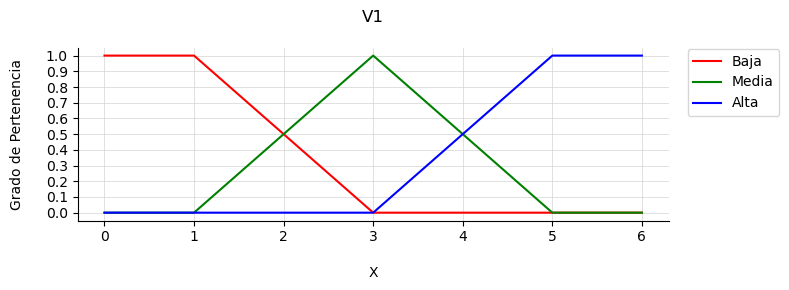

In [4]:
cb_v1 = ConjuntoBorroso("V1", 0, 7, 1)

cb_v1.crear_cb_trapecio("Baja", 0, 0, 1, 3, "red")
cb_v1.crear_cb_triangulo("Media", 1, 3, 5, "green")
cb_v1.crear_cb_trapecio("Alta", 3, 5, 6, 6, "blue")

cb_v1.grafica_cb()

### Ejemplo 2: Gràfica Conjunto Borroso V2

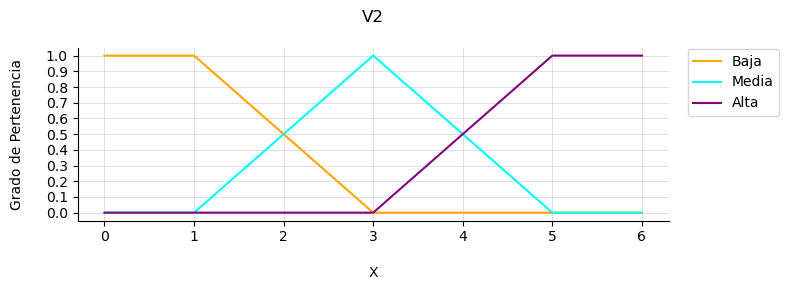

In [5]:
cb_v2 = ConjuntoBorroso("V2", 0, 7, 1)

cb_v2.crear_cb_trapecio("Baja", 0, 0, 1, 3, "orange")
cb_v2.crear_cb_triangulo("Media", 1, 3, 5, "cyan")
cb_v2.crear_cb_trapecio("Alta", 3, 5, 6, 6, "purple")

cb_v2.grafica_cb()

### Ejemplo 3: Gràfica Conjunto Borroso PM

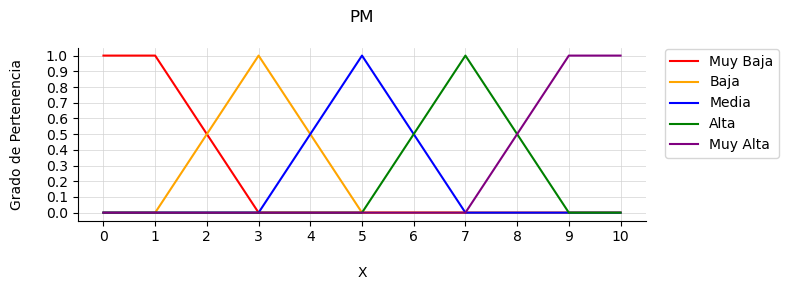

In [6]:
cb_pm = ConjuntoBorroso("PM", 0, 11, 1)

cb_pm.crear_cb_trapecio("Muy Baja", 0, 0, 1, 3, "red")
cb_pm.crear_cb_triangulo("Baja", 1, 3, 5, "orange")
cb_pm.crear_cb_triangulo("Media", 3, 5, 7, "blue")
cb_pm.crear_cb_triangulo("Alta", 5, 7, 9, "green")
cb_pm.crear_cb_trapecio("Muy Alta", 7, 9, 10, 10, "purple")

cb_pm.grafica_cb()

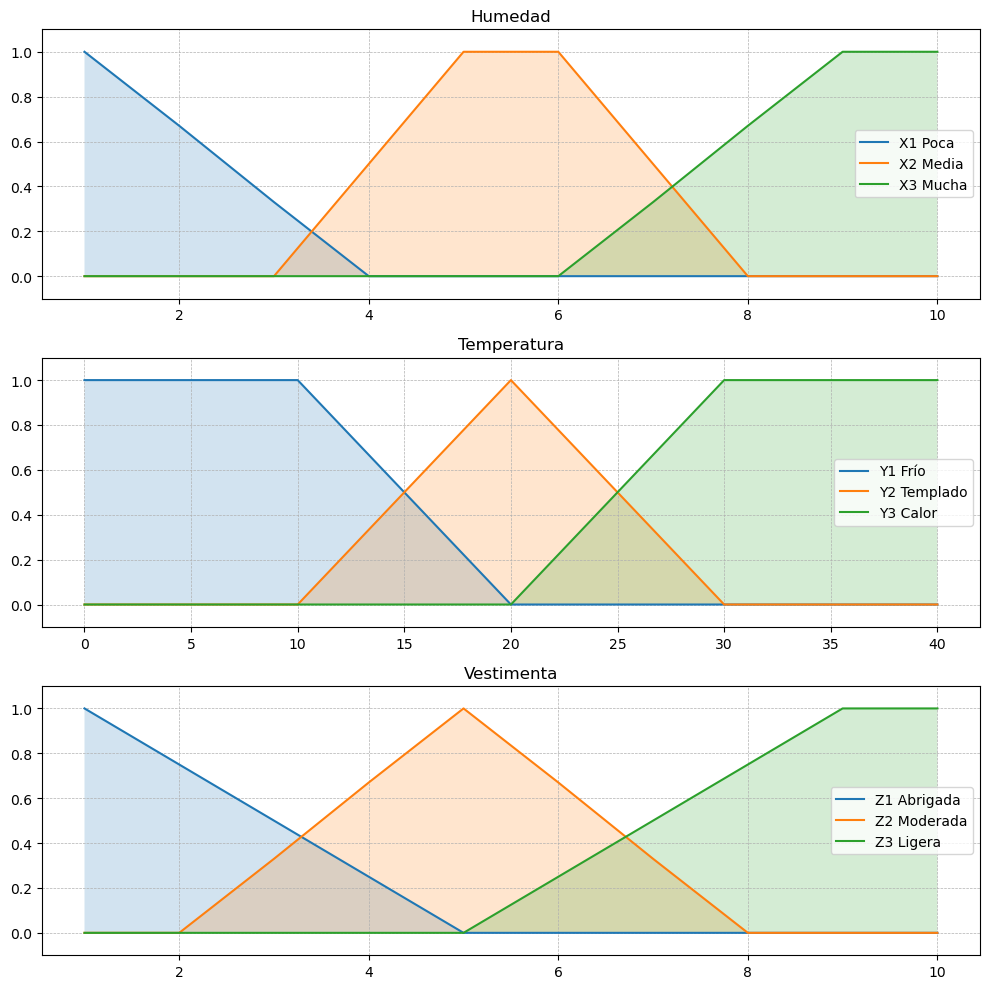

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fuzzy_set(ax, label, x, y):
    ax.plot(x, y, label=label)
    ax.fill_between(x, 0, y, alpha=0.2)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

def main():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Conjunto borroso para Humedad
    x_humedad = [1, 2, 3, 4, 5,6, 7, 8, 9, 10]
    y_poca = [1, 0.67, 0.33, 0, 0, 0, 0, 0, 0, 0]
    y_media = [0, 0, 0, 0.5, 1, 1, 0.5, 0, 0, 0]
    y_mucha = [0, 0, 0, 0, 0, 0, 0.33, 0.67, 1, 1]

    plot_fuzzy_set(ax1, "X1 Poca", x_humedad, y_poca)
    plot_fuzzy_set(ax1, "X2 Media", x_humedad, y_media)
    plot_fuzzy_set(ax1, "X3 Mucha", x_humedad, y_mucha)
    ax1.set_title("Humedad")
    ax1.set_ylim(-0.1, 1.1)

    # Conjunto borroso para Temperatura
    x_temp = [0,10, 15, 20, 25, 30, 35, 40]
    y_frio = [1, 1, .5, 0, 0, 0, 0, 0]
    y_templado = [0, 0, 0.5, 1, 0.5,  0, 0, 0]
    y_calor = [0, 0, 0, 0, 0.5, 1, 1,1]

    plot_fuzzy_set(ax2, "Y1 Frío", x_temp, y_frio)
    plot_fuzzy_set(ax2, "Y2 Templado", x_temp, y_templado)
    plot_fuzzy_set(ax2, "Y3 Calor", x_temp, y_calor)
    ax2.set_title("Temperatura")
    ax2.set_ylim(-0.1, 1.1)

    # Conjunto borroso para el vestimenta
    x_vestimenta =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    y_abrigada =[1,0.75, 0.5, 0.25, 0, 0, 0, 0, 0, 0]
    y_moderada =[0, 0, 0.33, 0.67, 1, 0.67, 0.33, 0,0,0]
    y_ligera =[0, 0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1]


    plot_fuzzy_set(ax3, "Z1 Abrigada", x_vestimenta, y_abrigada)
    plot_fuzzy_set(ax3, "Z2 Moderada", x_vestimenta, y_moderada)
    plot_fuzzy_set(ax3, "Z3 Ligera", x_vestimenta, y_ligera)
    plt.xlabel(f"Grado de pertenencia\n")
    ax3.set_title("Vestimenta")
    ax3.set_ylim(-0.1, 1.1)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

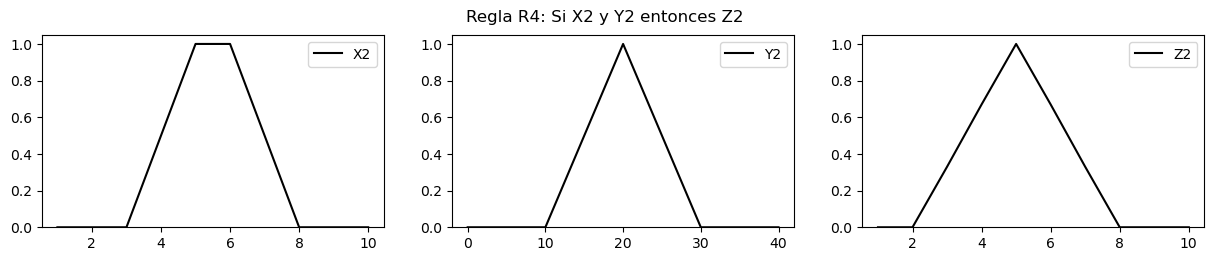

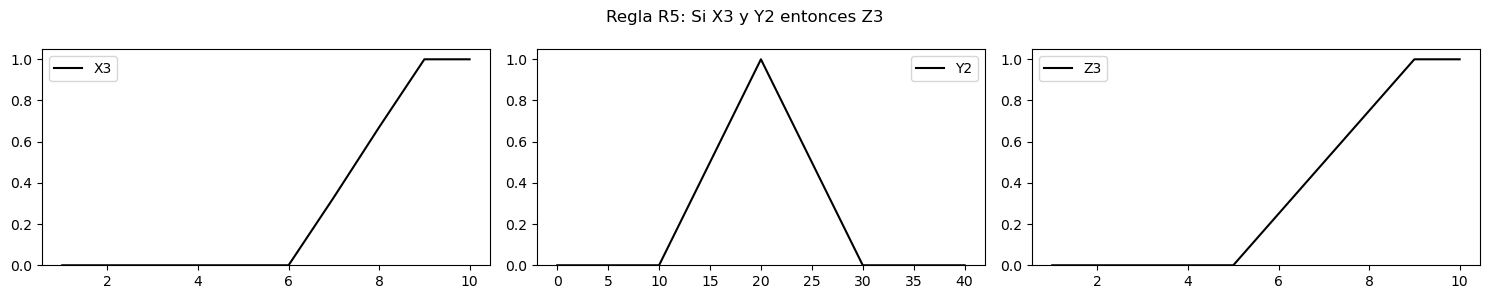

In [5]:
import matplotlib.pyplot as plt

# Definición de los universos y conjuntos borrosos:
universo_X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X2 = [0, 0, 0, 0.5, 1, 1, 0.5, 0, 0, 0]
X3 = [0, 0, 0, 0, 0, 0, 0.33, 0.67, 1, 1]

universo_Y = [0, 10, 15, 20, 25, 30, 35, 40]
Y2 = [0, 0, 0.5, 1, 0.5, 0, 0, 0]

universo_Z = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Z2 = [0, 0, 0.33, 0.67, 1, 0.67, 0.33, 0, 0, 0]
Z3 = [0, 0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1]

# Función para graficar
def plot_fuzzyset(ax, universe, fuzzy_set, xlabel, activation=None):
    ax.plot(universe, fuzzy_set, label=xlabel, linewidth=1.5, color='Black')
    ax.set_ylim([0, 1.05])
    ax.legend()

# Gráfico para R4
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 2.5))
fig.suptitle('Regla R4: Si X2 y Y2 entonces Z2')

plot_fuzzyset(axs[0], universo_X, X2, 'X2')
plot_fuzzyset(axs[1], universo_Y, Y2, 'Y2')
plot_fuzzyset(axs[2], universo_Z, Z2, 'Z2')

# Gráfico para R5
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
fig.suptitle('Regla R5: Si X3 y Y2 entonces Z3')

plot_fuzzyset(axs[0], universo_X, X3, 'X3')
plot_fuzzyset(axs[1], universo_Y, Y2, 'Y2')
plot_fuzzyset(axs[2], universo_Z, Z3, 'Z3')

plt.tight_layout()
plt.show()


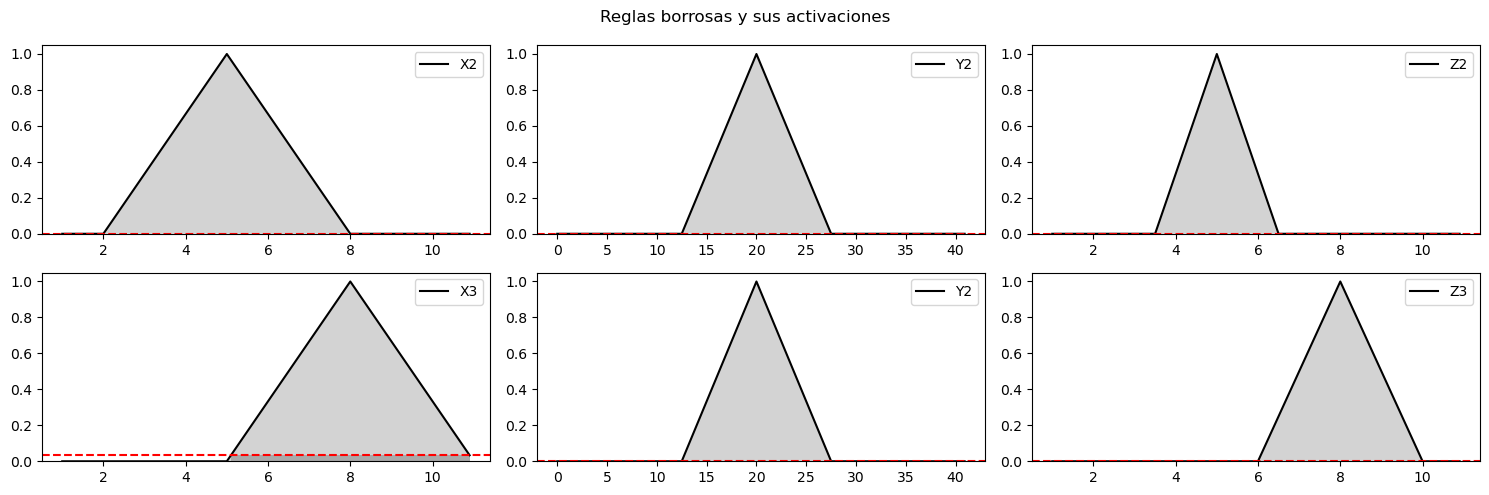

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definición de los universos y conjuntos borrosos:
universo_X = np.arange(1, 11, 0.1)
X2 = np.fmin(np.fmax(1 - np.abs(universo_X - 5) / 3, 0), np.fmax(1 - np.abs(universo_X - 5) / 5, 0))
X3 = np.fmax(0, 1 - np.abs(universo_X - 8) / 3)

universo_Y = np.arange(0, 41, 0.1)
Y2 = np.fmin(np.fmax(1 - np.abs(universo_Y - 20) / 7.5, 0), np.fmax(1 - np.abs(universo_Y - 20) / 12.5, 0))

universo_Z = np.arange(1, 11, 0.1)
Z2 = np.fmin(np.fmax(1 - np.abs(universo_Z - 5) / 3, 0), np.fmax(1 - np.abs(universo_Z - 5) / 1.5, 0))
Z3 = np.fmax(0, 1 - np.abs(universo_Z - 8) / 2)

# Valores de activación para las reglas
activation_X2 = np.interp(36, universo_X, X2)
activation_X3 = np.interp(36, universo_X, X3)
activation_Y2 = np.interp(-2.25, universo_Y, Y2)

# Grado de cumplimiento de las reglas
R4_activation = min(activation_X2, activation_Y2)
R5_activation = min(activation_X3, activation_Y2)

# Salidas de las reglas
R4_output = np.fmin(Z2, R4_activation)
R5_output = np.fmin(Z3, R5_activation)

# Salida agregada
aggregated = np.fmax(R4_output, R5_output)

# Función para graficar
def plot_fuzzyset(ax, universe, fuzzy_set, xlabel, activation=None):
    ax.plot(universe, fuzzy_set, label=xlabel, linewidth=1.5, color='Black')
    ax.fill_between(universe, 0, fuzzy_set, facecolor='lightgray')
    if activation is not None:
        ax.axhline(y=activation, color='Red', linestyle='--')
        ax.fill_between(universe, 0, activation, where=[(val >= activation) for val in fuzzy_set], facecolor='darkgray', interpolate=True)
    ax.set_ylim([0, 1.05])
    ax.legend()
Test
# Gráficos para las reglas
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 5))

fig.suptitle('Reglas borrosas y sus activaciones')

plot_fuzzyset(axs[0][0], universo_X, X2, 'X2', activation_X2)
plot_fuzzyset(axs[0][1], universo_Y, Y2, 'Y2', activation_Y2)
plot_fuzzyset(axs[0][2], universo_Z, Z2, 'Z2', R4_activation)

plot_fuzzyset(axs[1][0], universo_X, X3, 'X3', activation_X3)
plot_fuzzyset(axs[1][1], universo_Y, Y2, 'Y2', activation_Y2)
plot_fuzzyset(axs[1][2], universo_Z, Z3, 'Z3', R5_activation)

plt.tight_layout()
plt.show()


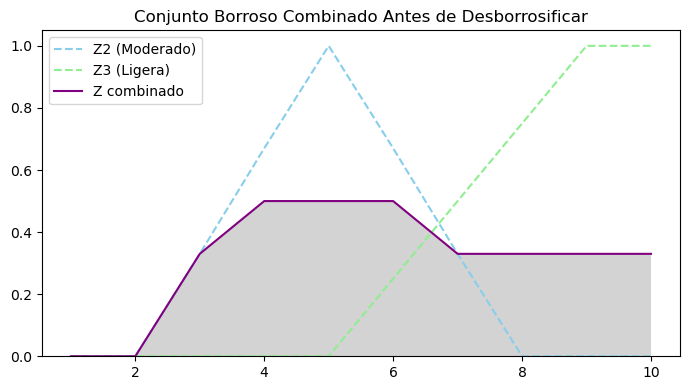

In [52]:
import numpy as np

# Unión de los conjuntos Z2 y Z3 basado en las activaciones
Z_combined = np.fmax(np.minimum(Z2, 0.5), np.minimum(Z3, 0.33))

# Gráficos
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(universo_Z, Z2, label='Z2 (Moderado)', color='skyblue', linestyle='--')
ax.plot(universo_Z, Z3, label='Z3 (Ligera)', color='lightgreen', linestyle='--')
ax.plot(universo_Z, Z_combined, label='Z combinado', color='purple')
ax.fill_between(universo_Z, 0, Z_combined, facecolor='lightgray')

ax.set_title('Conjunto Borroso Combinado Antes de Desborrosificar')
ax.set_ylim([0, 1.05])
ax.legend()

plt.tight_layout()
plt.show()


In [59]:
# Núcleo
nucleo_points = [x for x, val in zip(universo_Z, Z_combined) if val == 1]

# Si existen puntos en el núcleo, tomamos el primero ya que todos tendrán grado de pertenencia de 1
nucleo_max_point = nucleo_points[0] if nucleo_points else None

# Soporte
soporte_start = next((x for x, val in zip(universo_Z, Z_combined) if val > 0), None)
soporte_end = next((x for x, val in reversed(list(zip(universo_Z, Z_combined))) if val > 0), None)

# α-corte para α=0.25
alpha_corte_start = next((x for x, val in zip(universo_Z, Z_combined) if val >= 0.25), None)
alpha_corte_end = next((x for x, val in reversed(list(zip(universo_Z, Z_combined))) if val >= 0.25), None)

nucleo_max_point, (soporte_start, soporte_end), (alpha_corte_start, alpha_corte_end)


AttributeError: 'numpy.ndarray' object has no attribute 'index'

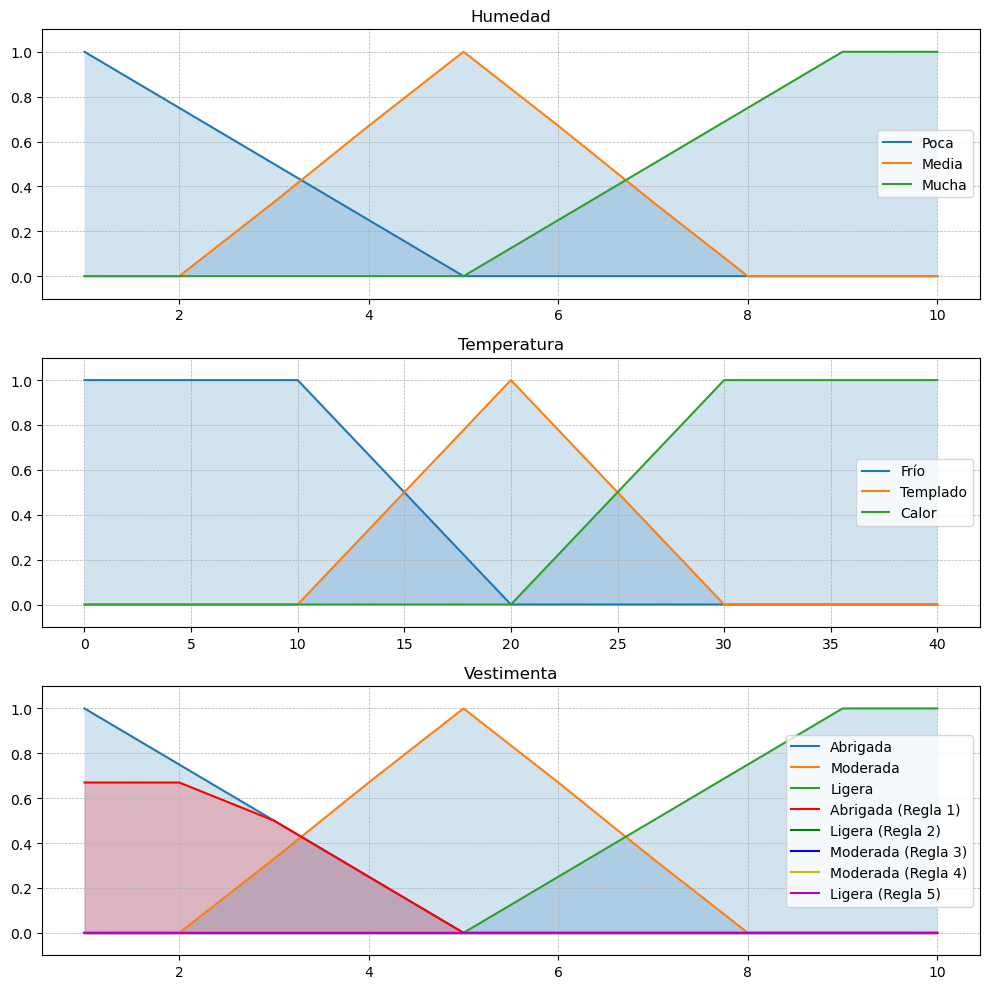

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def plot_fuzzy_set(ax, label, x, y, color=None):
    ax.plot(x, y, label=label, color=color)
    ax.fill_between(x, 0, y, alpha=0.2, color=color)
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

def clip_to_activation(y_original, activation):
    return [min(val, activation) for val in y_original]

def interpolate_value(x, y, x_val):
    return np.interp(x_val, x, y)

def main():
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Conjunto borroso para Humedad
    x_humedad = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Conjunto borroso para Temperatura
    x_temp = [0, 10, 15, 20, 25, 30, 35, 40]

    # Conjunto borroso para la vestimenta
    x_vestimenta = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    y_abrigada = [1, 0.75, 0.5, 0.25, 0, 0, 0, 0, 0, 0]
    y_moderada = [0, 0, 0.33, 0.67, 1, 0.67, 0.33, 0, 0, 0]
    y_ligera = [0, 0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1]
       # Conjunto borroso para Humedad
    x_humedad = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    y_poca = [1, 0.75, 0.5, 0.25, 0, 0, 0, 0, 0, 0]
    y_media = [0, 0, 0.33, 0.67, 1, 0.67, 0.33, 0, 0, 0]
    y_mucha = [0, 0, 0, 0, 0, 0.25, 0.5, 0.75, 1, 1]
        # Conjunto borroso para Temperatura
    x_temp = [0,10, 15, 20, 25, 30, 35, 40]
    y_frio = [1, 1, .5, 0, 0, 0, 0, 0]
    y_templado = [0, 0, 0.5, 1, 0.5,  0, 0, 0]
    y_calor = [0, 0, 0, 0, 0.5, 1, 1,1]
    # Input values
    temp_val = 5
    humedad_val = 8
    
    # Activation for each fuzzy set
    y_temp_frio = [1, 1, .5, 0, 0, 0, 0, 0]
    act_temp_frio = interpolate_value(x_temp, y_temp_frio, temp_val)
    
    y_temp_templado = [0, 0, 0.5, 1, 0.5,  0, 0, 0]
    act_temp_templado = interpolate_value(x_temp, y_temp_templado, temp_val)
    
    y_temp_calor = [0, 0, 0, 0, 0.5, 1, 1, 1]
    act_temp_calor = interpolate_value(x_temp, y_temp_calor, temp_val)
    
    
    act_hum_poca = [1, 0.67, 0.33, 0, 0, 0, 0, 0, 0, 0][x_humedad.index(humedad_val)]
    act_hum_media = [0, 0, 0, 0.5, 1, 1, 0.5, 0, 0, 0][x_humedad.index(humedad_val)]
    act_hum_mucha = [0, 0, 0, 0, 0, 0, 0.33, 0.67, 1, 1][x_humedad.index(humedad_val)]

    # Rule activations
    act_rule1 = min(act_temp_frio, act_hum_mucha)
    act_rule2 = min(act_temp_calor, act_hum_poca)
    act_rule3 = min(act_temp_templado, act_hum_media)
    act_rule4 = min(act_temp_frio, act_hum_poca)
    act_rule5 = min(act_temp_calor, act_hum_mucha)

    # Clip the Vestimenta to the rule activations
    y_abrigada_rule1 = clip_to_activation(y_abrigada, act_rule1)
    y_ligera_rule2 = clip_to_activation(y_ligera, act_rule2)
    y_moderada_rule3 = clip_to_activation(y_moderada, act_rule3)
    y_moderada_rule4 = clip_to_activation(y_moderada, act_rule4)
    y_ligera_rule5 = clip_to_activation(y_ligera, act_rule5)

    # Plotting
    plot_fuzzy_set(ax1, "Poca", x_humedad, y_poca)
    plot_fuzzy_set(ax1, "Media", x_humedad, y_media)
    plot_fuzzy_set(ax1, "Mucha", x_humedad, y_mucha)
    ax1.set_title("Humedad")
    ax1.set_ylim(-0.1, 1.1)

    plot_fuzzy_set(ax2, "Frío", x_temp, y_frio)
    plot_fuzzy_set(ax2, "Templado", x_temp, y_templado)
    plot_fuzzy_set(ax2, "Calor", x_temp, y_calor)
    ax2.set_title("Temperatura")
    ax2.set_ylim(-0.1, 1.1)

    plot_fuzzy_set(ax3, "Abrigada", x_vestimenta, y_abrigada)
    plot_fuzzy_set(ax3, "Moderada", x_vestimenta, y_moderada)
    plot_fuzzy_set(ax3, "Ligera", x_vestimenta, y_ligera)
    plot_fuzzy_set(ax3, "Abrigada (Regla 1)", x_vestimenta, y_abrigada_rule1, color='r')
    plot_fuzzy_set(ax3, "Ligera (Regla 2)", x_vestimenta, y_ligera_rule2, color='g')
    plot_fuzzy_set(ax3, "Moderada (Regla 3)", x_vestimenta, y_moderada_rule3, color='b')
    plot_fuzzy_set(ax3, "Moderada (Regla 4)", x_vestimenta, y_moderada_rule4, color='y')
    plot_fuzzy_set(ax3, "Ligera (Regla 5)", x_vestimenta, y_ligera_rule5, color='m')
    ax3.set_title("Vestimenta")
    ax3.set_ylim(-0.1, 1.1)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Conjuntos borrosos
Hmedia = np.array([0.5, 1, 1, 0.5])
Tcalor = np.array([0.5,1,1,1])
Rintenso = np.array([0.25,0.5,0.75,])

# T-norma (AND)
Ractivada = np.minimum.outer(Hmedia, Tcalor)
df_activated = pd.DataFrame(Ractivada, columns=[25, 30, 35, 40], index=list(range(1, 5)))
print("Matriz Ractivada:")
print(df_activated)


Matriz Ractivada:
    25   30   35   40
1  0.5  0.5  0.5  0.5
2  0.5  1.0  1.0  1.0
3  0.5  1.0  1.0  1.0
4  0.5  0.5  0.5  0.5


In [21]:
import numpy as np
import pandas as pd

# Elementos de Ractivada y Rintenso
Ractivada = np.array([0.50, 1, 1, 1, 0.5, 0.67, 0.67, 0.67, 0.33, 0.33, 0.33, 0.33])
Rintenso = np.array([0.25, 0.5, 0.75, 1, 1])

# Valores proporcionados
Ractivada_nuevos = np.array([0.50, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 0.5, 1, 1, 1, 0.5, 0.5, 0.5, 0.5])

# Calcula la implicación utilizando la implicación de Mamdani
def mamdani_implication(a, b):
    return np.minimum(a, b)

# Calcula la matriz de implicación de tamaño 12x5 utilizando la implicación de Mamdani
implication_matrix = np.zeros((len(Ractivada_nuevos), len(Rintenso)))

for i in range(len(Ractivada_nuevos)):
    for j in range(len(Rintenso)):
        implication_matrix[i, j] = mamdani_implication(Ractivada_nuevos[i], Rintenso[j])

# Crea un DataFrame para mostrar la matriz de implicación
df_implication = pd.DataFrame(implication_matrix, columns=Rintenso, index=Ractivada_nuevos)

print("Matriz de Implicación (Mamdani):")
print(df_implication)


Matriz de Implicación (Mamdani):
     0.25  0.50  0.75  1.00  1.00
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5
1.0  0.25   0.5  0.75   1.0   1.0
1.0  0.25   0.5  0.75   1.0   1.0
1.0  0.25   0.5  0.75   1.0   1.0
0.5  0.25   0.5  0.50   0.5   0.5
1.0  0.25   0.5  0.75   1.0   1.0
1.0  0.25   0.5  0.75   1.0   1.0
1.0  0.25   0.5  0.75   1.0   1.0
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5
0.5  0.25   0.5  0.50   0.5   0.5


In [22]:
import numpy as np

conjunto_borroso = np.array([
    [0.25, 0.50, 0.50, 0.50, 0.50],
    [0.25, 0.50, 0.75, 1.00, 1.00],
    [0.25, 0.50, 0.75, 1.00, 1.00],
    [0.25, 0.50, 0.75, 1.00, 1.00],
    [0.25, 0.50, 0.50, 0.50, 0.50],
    [0.25, 0.50, 0.67, 0.67, 0.67],
    [0.25, 0.50, 0.67, 0.67, 0.67],
    [0.25, 0.50, 0.67, 0.67, 0.67],
    [0.25, 0.33, 0.33, 0.33, 0.33],
    [0.25, 0.33, 0.33, 0.33, 0.33],
    [0.25, 0.33, 0.33, 0.33, 0.33],
    [0.25, 0.33, 0.33, 0.33, 0.33]
])

conjunto_valores = np.array([0.25, 0.5, 0.67, 0.67, 0.67])
cardinalidad_borrosa = np.sum(conjunto_borroso * conjunto_valores) / np.sum(conjunto_borroso)

print("Cardinalidad Borrosa del conjunto de valores:")
print(cardinalidad_borrosa)


Cardinalidad Borrosa del conjunto de valores:
0.5967794316644114


Voy a resolver y simplificar la expresión que proporcionaste:

\[
\frac{0.25}{0.25} + \frac{0.5}{0.5} + \frac{0.67}{0.75} + \frac{0.67}{1} + \frac{0.67}{1}
\]

Simplificando cada fracción y sumando:

\[
1 + 1 + \frac{0.67}{0.75} + 0.67 + 0.67
\]

\[
2 + \frac{0.67}{0.75} + 1.34
\]

Ahora, resolviendo la fracción:

\[
\frac{0.67}{0.75} = 0.89333...
\]

Finalmente:

\[
2 + 0.89333... + 1.34 = 4.23333...
\]

Por lo tanto, el resultado simplificado de la expresión es aproximadamente \(4.233\).